# Feature Engineering & Data Pre-Processing

In [1]:
#!pip install missingno

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [3]:
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: '%.3f' % x)
pd.set_option("display.width", 500)

In [4]:
def load_application_train():
    data = pd.read_csv("/Users/huseyinefkanalp/Desktop/DataScience/Miuul/FeatureEngineering/datasets/application_train.csv")
    return data

In [5]:
def load_titanic():
    data = pd.read_csv("/Users/huseyinefkanalp/Desktop/DataScience/Miuul/FeatureEngineering/datasets/titanic.csv")
    return data

In [6]:
app_df = load_application_train()
tit_df = load_titanic()

## Outliers (Aykırı Değerler)

### Grafik Teknikle Aykırı Değerler
Eğer grafik tekniği ile aykırı değerleri görmek istersek bunun için boxPlot(Kutu grafiği) kullanılır.

* boxplot : Bir sayısal değişkenin dağılım bilgisini verir

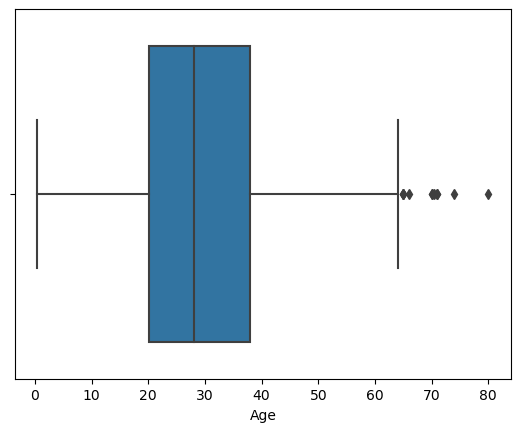

In [7]:
sns.boxplot(x=tit_df["Age"])
plt.show()

### Aykırı Değerler Nasıl Yakalınır?

In [8]:
#Çeyreklikler
q1 = tit_df["Age"].quantile(0.25)
q3 = tit_df["Age"].quantile(0.75)
# Iqr
iqr = q3 - q1
#UpLimit
up = q3 + 1.5 * iqr
#LowLimit
low = q1 - 1.5 * iqr

In [9]:
# Aykırı değerlerin indexlerini getirdik
tit_df[(tit_df["Age"]>up)|(tit_df["Age"]<low)].index

Int64Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

### Aykırı değer var mı yok mu?

In [10]:
tit_df[(tit_df["Age"]>up)|(tit_df["Age"]<low)].any(axis=None)

True

## Fonksiyonlaştırma

In [11]:
def outlier_thresholds(df,var,q1=0.25,q3=0.75):
    quartile1 = df[var].quantile(q1)
    quartile3 = df[var].quantile(q3)
    iqr = q3 - q1
    low_limit = q1 - 1.5 * iqr
    up_limit = q3 + 1.5 * iqr
    return low_limit, up_limit

In [12]:
def check_outlier(df,var):
    low_limit,up_limit = outlier_thresholds(df,var)
    return df[(df[var]>up_limit)|(df[var]<low_limit)].any(axis=None)

In [13]:
outlier_thresholds(tit_df, "Age")

(-0.5, 1.5)

In [14]:
check_outlier(tit_df, "Age")

True

In [15]:
check_outlier(tit_df, "Fare")

True

In [16]:
# grab_col_names

In [17]:
def grab_col_names(df, cat_th=10, car_th=20):
    """
    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.
    
    Parameters
    -------
    	df: dataframe
        		Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
        		numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optional
        		kategorik fakat kardinal değişkenler için sınıf eşik değeri
    Returns
    ------
    	cat_cols: list
        		Kategorik değişken listesi
        num_cols: list
        		Numerik değişken listesi
        
    """
    
    # cat_cols, cat_but_car
    cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
    num_but_cat = [col for col in df.columns if df[col].nunique() < cat_th and df[col].dtypes != "O"]
    cat_but_car = [col for col in df.columns if df[col].nunique() > car_th and df[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    
    # num_cols
    num_cols = [col for col in df.columns if df[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    
    print(f"Observations: {df.shape[0]}")
    print(f"Variables: {df.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    print(f"num_but_cat: {len(num_but_cat)}")
    return cat_cols, num_cols, cat_but_car

In [18]:
cat_cols, num_cols, cat_but_car = grab_col_names(tit_df)

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4


In [19]:
cat_cols

['Sex', 'Embarked', 'Survived', 'Pclass', 'SibSp', 'Parch']

In [20]:
num_cols

['PassengerId', 'Age', 'Fare']

In [21]:
num_cols = [col for col in num_cols if col not in "PassengerId"]
num_cols

['Age', 'Fare']

In [22]:
cat_but_car

['Name', 'Ticket', 'Cabin']

In [23]:
for col in num_cols:
    print(col, check_outlier(tit_df, col))

Age True
Fare True


In [24]:
cat_cols, num_cols, cat_but_car = grab_col_names(app_df)

Observations: 307511
Variables: 122
cat_cols: 54
num_cols: 67
cat_but_car: 1
num_but_cat: 39


In [25]:
for col in num_cols:
    print(col, check_outlier(app_df, col))

SK_ID_CURR True
CNT_CHILDREN True
AMT_INCOME_TOTAL True
AMT_CREDIT True
AMT_ANNUITY True
AMT_GOODS_PRICE True
REGION_POPULATION_RELATIVE False
DAYS_BIRTH True
DAYS_EMPLOYED True
DAYS_REGISTRATION True
DAYS_ID_PUBLISH True
OWN_CAR_AGE True
CNT_FAM_MEMBERS True
HOUR_APPR_PROCESS_START True
EXT_SOURCE_1 False
EXT_SOURCE_2 False
EXT_SOURCE_3 False
APARTMENTS_AVG False
BASEMENTAREA_AVG False
YEARS_BEGINEXPLUATATION_AVG False
YEARS_BUILD_AVG False
COMMONAREA_AVG False
ELEVATORS_AVG False
ENTRANCES_AVG False
FLOORSMAX_AVG False
FLOORSMIN_AVG False
LANDAREA_AVG False
LIVINGAPARTMENTS_AVG False
LIVINGAREA_AVG False
NONLIVINGAPARTMENTS_AVG False
NONLIVINGAREA_AVG False
APARTMENTS_MODE False
BASEMENTAREA_MODE False
YEARS_BEGINEXPLUATATION_MODE False
YEARS_BUILD_MODE False
COMMONAREA_MODE False
ELEVATORS_MODE False
ENTRANCES_MODE False
FLOORSMAX_MODE False
FLOORSMIN_MODE False
LANDAREA_MODE False
LIVINGAPARTMENTS_MODE False
LIVINGAREA_MODE False
NONLIVINGAPARTMENTS_MODE False
NONLIVINGAREA_MODE Fa

In [26]:
## Aykırı değerlerin kendilerine erişmek

In [27]:
def grab_outliers(df, col, index=False):
    low, up = outlier_thresholds(df, col)
    if df[((df[col]<low)|(df[col]>up))].shape[0]> 10:
        print(df[((df[col]<low)|(df[col]>up))].head())
    else:
        print(df[((df[col]<low)|(df[col]>up))])
    if index:
        outlier_index = df[(df[col]<low)|(df[col]>up)].index
        return outlier_index

In [28]:
age_index = grab_outliers(tit_df, "Age", True)

   PassengerId  Survived  Pclass                                               Name     Sex    Age  SibSp  Parch            Ticket   Fare Cabin Embarked
0            1         0       3                            Braund, Mr. Owen Harris    male 22.000      1      0         A/5 21171  7.250   NaN        S
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female 38.000      1      0          PC 17599 71.283   C85        C
2            3         1       3                             Heikkinen, Miss. Laina  female 26.000      0      0  STON/O2. 3101282  7.925   NaN        S
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female 35.000      1      0            113803 53.100  C123        S
4            5         0       3                           Allen, Mr. William Henry    male 35.000      0      0            373450  8.050   NaN        S


### Aykırı değer problemini çözme

#### Silme

In [29]:
low, up = outlier_thresholds(tit_df, "Fare")
tit_df.shape


(891, 12)

In [30]:
#Aykırı olmayanları getirme
tit_df[~((tit_df["Fare"]<low)|(tit_df["Fare"]>up))].shape

(15, 12)

In [31]:
def remove_outlier(df, var):
    low_limit, up_limit = outlier_thresholds(df, var)
    removed_outlier_df = df[~((df[var]<low_limit)|(df[var]>up_limit))]
    return removed_outlier_df

In [32]:
cat_cols, num_cols, cat_but_car = grab_col_names(tit_df)

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4


In [33]:
num_cols = [col for col in num_cols if col not in "PassengerId"]

In [34]:
for col in num_cols:
    tit_new_df = remove_outlier(tit_df, col)

In [35]:
tit_df.shape[0]

891

In [36]:
tit_new_df.shape[0]

15

In [37]:
def replace_with_thresholds(df, var):
    low_limit, up_limit = outlier_thresholds(df, var)
    df.loc[(df[var] < low_limit), var] = low_limit
    df.loc[(df[var] > up_limit), var] = up_limit

## Recap

In [38]:
df = load_titanic()

In [39]:
# Aykırı değeri saptama işlemi
outlier_thresholds(df, "Age")

(-0.5, 1.5)

In [40]:
# Bu threshold'lara göre aykırı değer var mı yok mu?

check_outlier(df, "Age")

True

In [41]:
# Outlier'ları bize getir

grab_outliers(df, "Age", index = True)

   PassengerId  Survived  Pclass                                               Name     Sex    Age  SibSp  Parch            Ticket   Fare Cabin Embarked
0            1         0       3                            Braund, Mr. Owen Harris    male 22.000      1      0         A/5 21171  7.250   NaN        S
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female 38.000      1      0          PC 17599 71.283   C85        C
2            3         1       3                             Heikkinen, Miss. Laina  female 26.000      0      0  STON/O2. 3101282  7.925   NaN        S
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female 35.000      1      0            113803 53.100  C123        S
4            5         0       3                           Allen, Mr. William Henry    male 35.000      0      0            373450  8.050   NaN        S


Int64Index([  0,   1,   2,   3,   4,   6,   7,   8,   9,  10,
            ...
            880, 881, 882, 883, 884, 885, 886, 887, 889, 890], dtype='int64', length=700)

In [42]:
#Outlier'ları silme işlemi

remove_outlier(df, "Age").shape

(191, 12)

In [43]:
# Threshold'lar ile değiştir (Baskılama yöntemi)

replace_with_thresholds(df, "Age")

In [44]:
# Tekrar bakıyoruz outlier var mı?

check_outlier(df, "Age")

False

## Çok Değişkenli Aykırı Değer Analizi: Local Outlier Factor


* Tek başına aykırı olamayacak değerler birlikte ele alındığında bu durum aykırılık yaratıyor olabilir.

Örneğin: yaş ve evlenmeSayısı adlı değişkenlerimiz olsun evlenmeSayısı = 3 olursa aykırı bir değer olmayabilir.
ancak evlenmeSayısı = 3 yaş = 17 olursa anormaldir yani aykırı değerdir.

### LOF (Local Outlier Factor) Yöntemi:
* Çok değişkenli bir aykırı değer belirleme yöntemidir.
* Gözlemleri bulundukları konumda yoğunluk tabanlı skorlayarak buna göre aykırı değer olabilecek değerleri tanıma imkanı sağlar.

* Aşşağıda görülen A noktası komşularının lokal yoğunluklarından oldukça faklıdır yani A noktası komşularının noktasından anlamlı şekilde düşüktür, farklıdır. Bundan dolayı A noktasına aykırı değer muamelesi yapılır.

* LOF yöntemi bize bu komşuluklara göre uzaklık skoru hesaplaması sağlar.

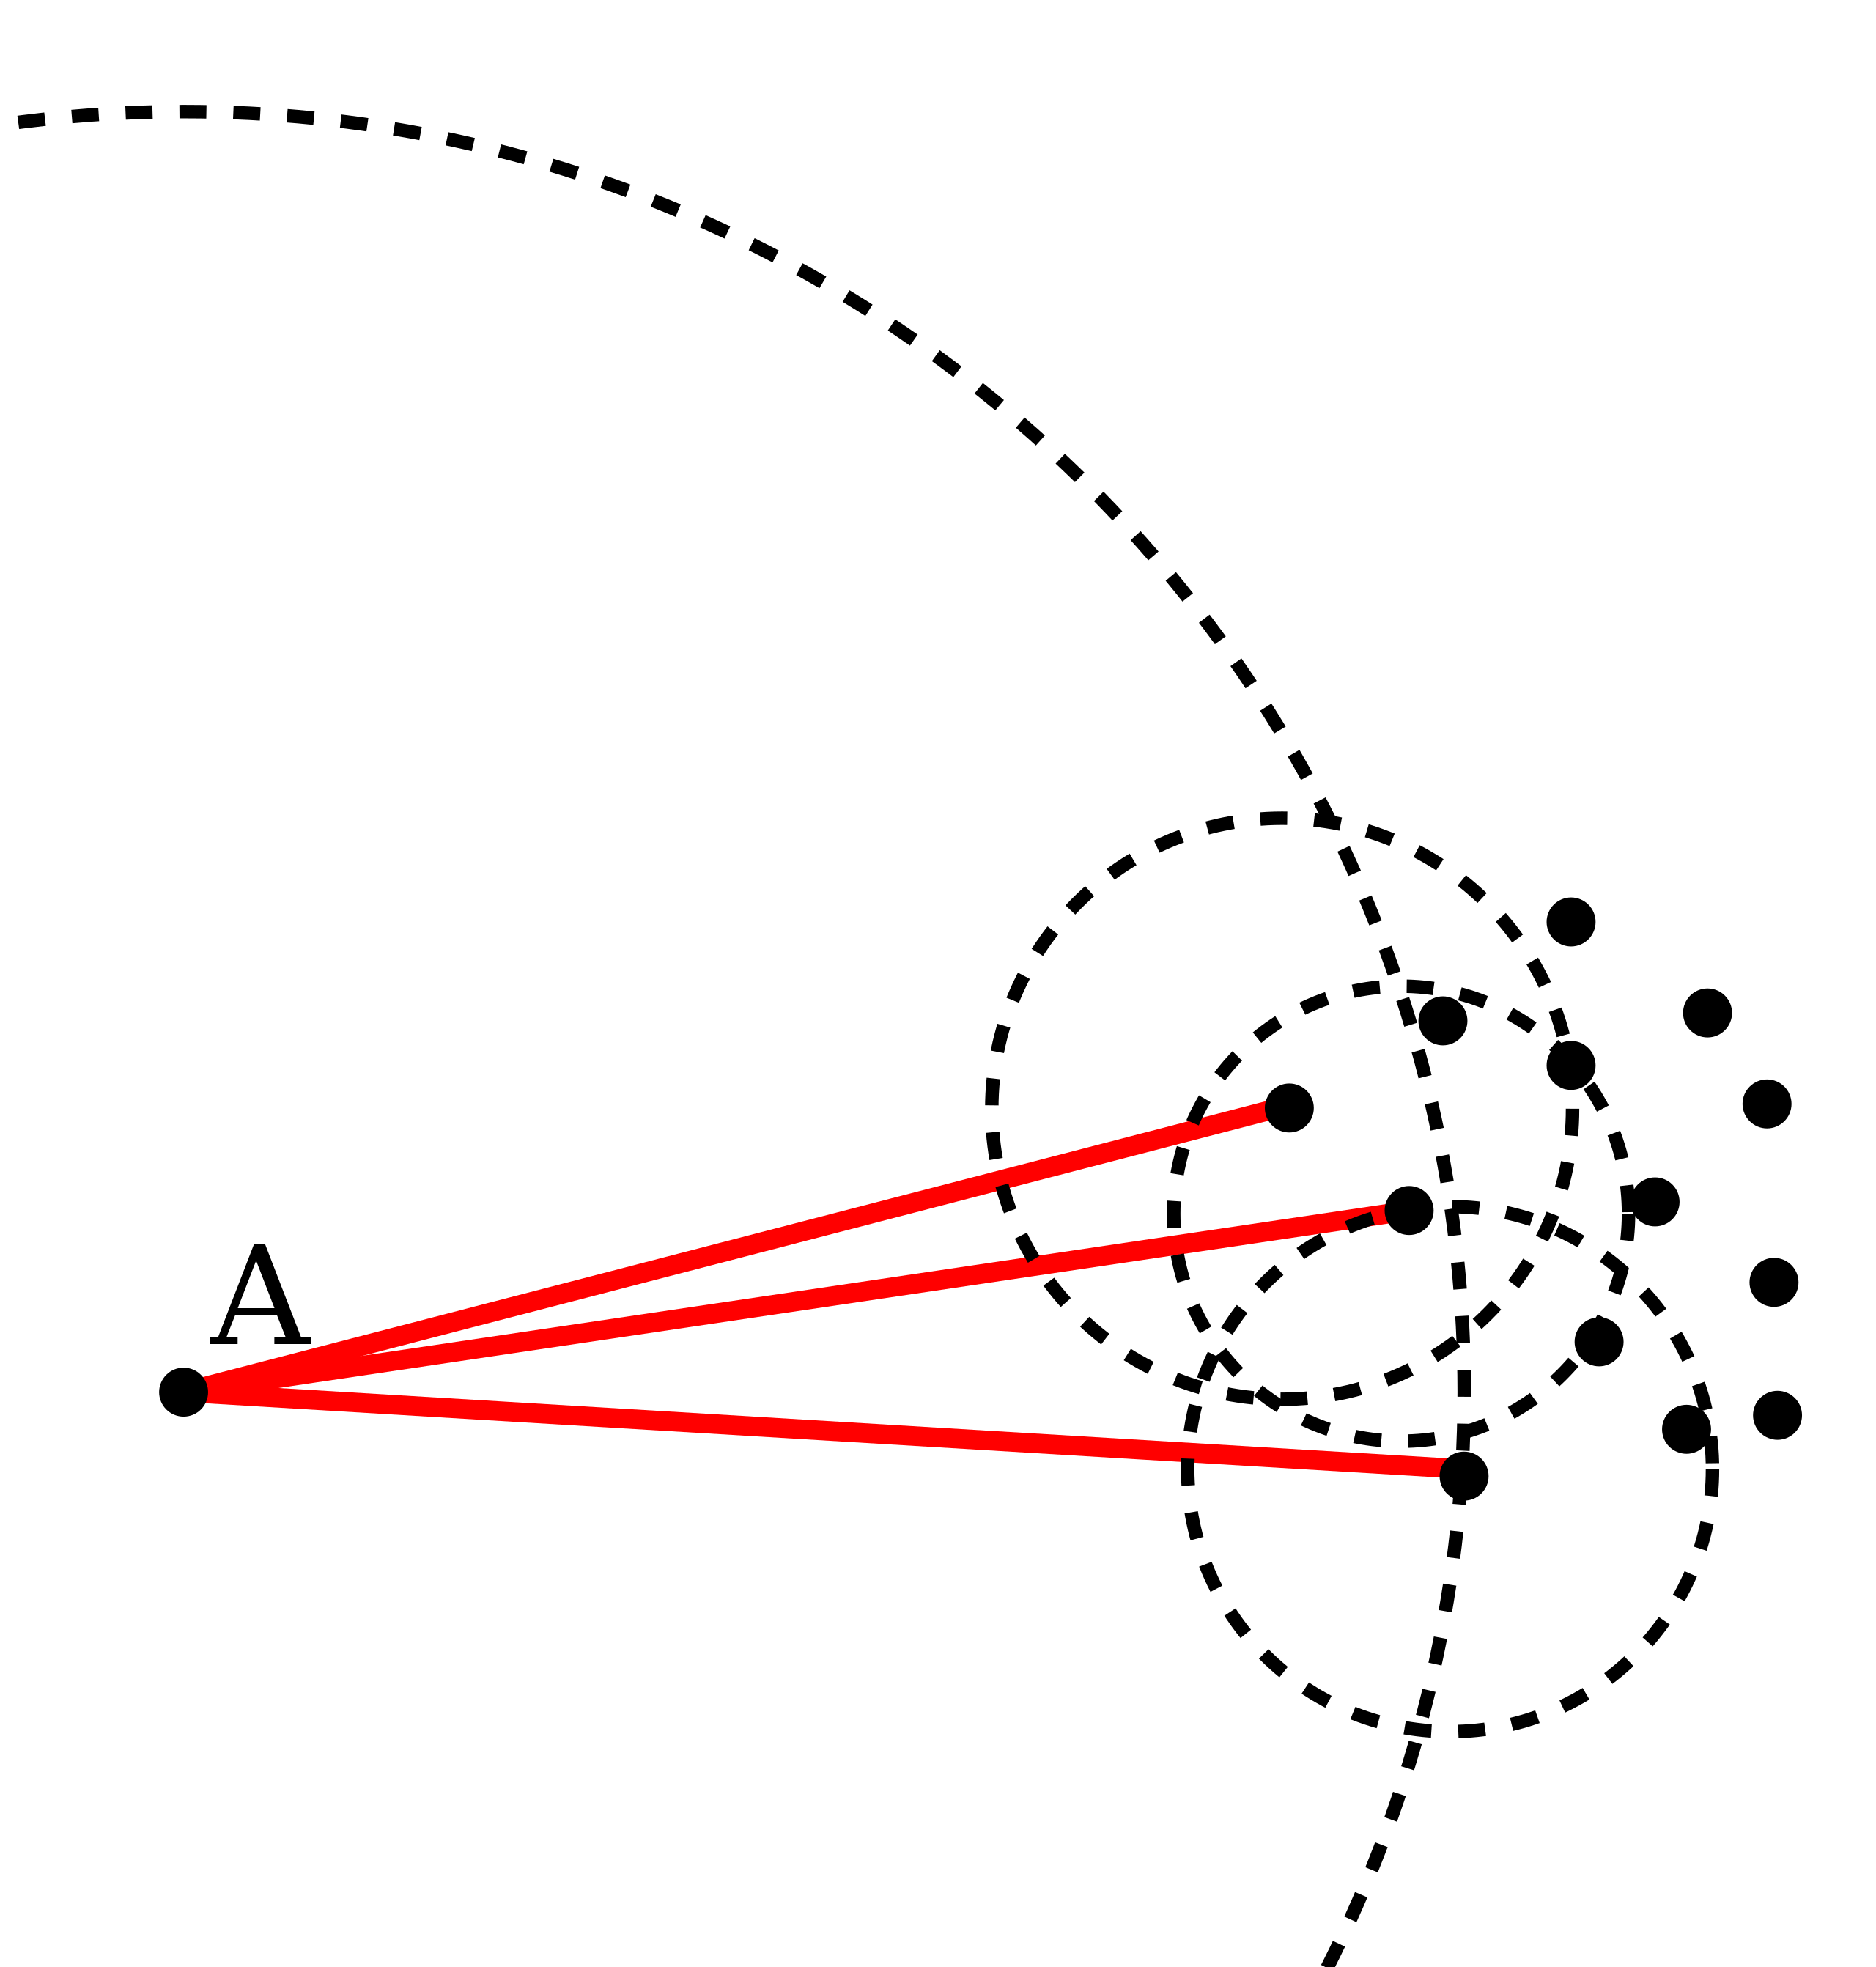

### İnlier Kavramı

* LOF yöntemi der ki; ben size bir skor vericem bu skor 1'e ne kadar yakınsa bu skor o kadar iyidir der.
* Dolayısıyla 1 den uzaklaştıkça ilgili gözlemin outlier olma ihtimali artar der.

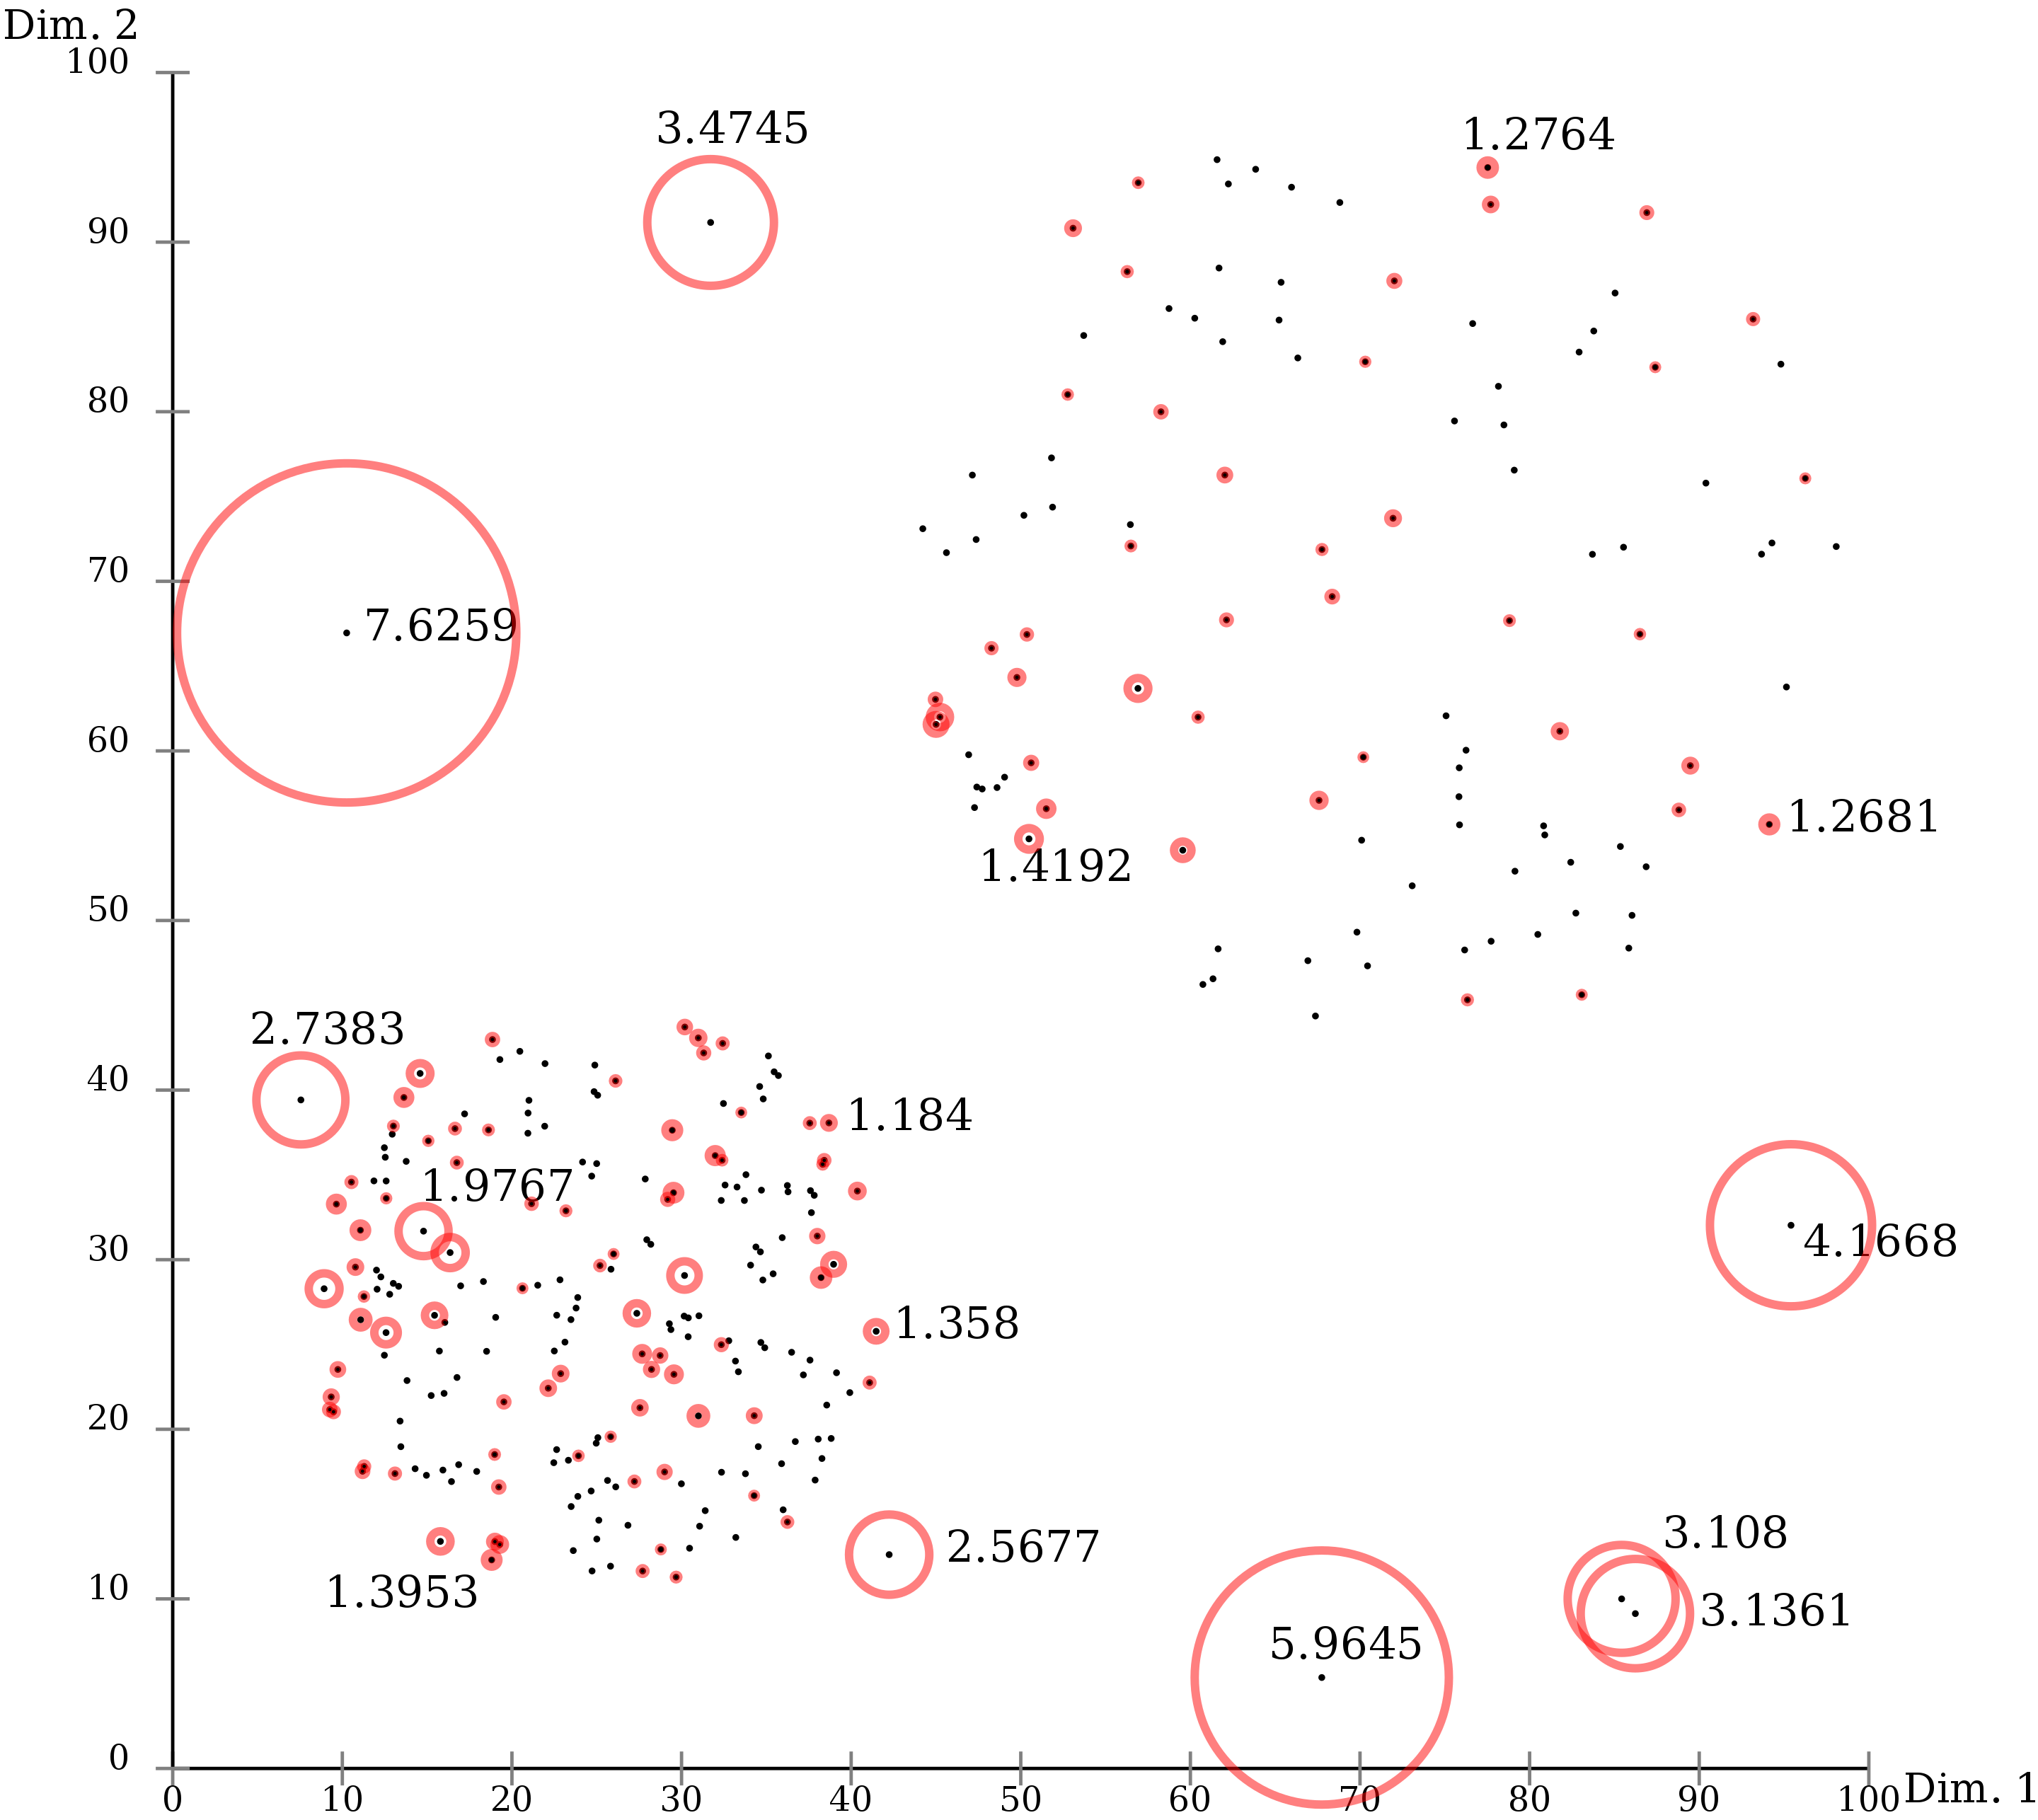

In [46]:
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64'])
df = df.dropna()

In [47]:
df.head()

,carat,depth,table,price,x,y,z
0,0.230,61.500,55.000,326,3.950,3.980,2.430
1,0.210,59.800,61.000,326,3.890,3.840,2.310
2,0.230,56.900,65.000,327,4.050,4.070,2.310
3,0.290,62.400,58.000,334,4.200,4.230,2.630
4,0.310,63.300,58.000,335,4.340,4.350,2.750


In [48]:
# Bu değişken de aykırı değer var mı?

for col in df.columns:
    print(col, check_outlier(df, col))

carat True
depth True
table True
price True
x True
y True
z True


In [49]:
# Aykırı değer bulunan bir değişkeni seçsek ve bu değişkende kaç tane outlier olduğunu öğrenmek istersek

low, up = outlier_thresholds(df, "carat")

In [50]:
df[(df["carat"]<low)|(df["carat"]>up)].shape

(5442, 7)

In [54]:
clf = LocalOutlierFactor(n_neighbors = 20)

In [55]:
clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [56]:
df_scores = clf.negative_outlier_factor_

In [58]:
df_scores[:5]

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521])

In [60]:
# en kötü 5 gözlem
np.sort(df_scores)[:5]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092])